<a href="https://colab.research.google.com/github/rana-salah/Computational-Genomics-Class/blob/main/Trinucleotides_Frequency_Calculation_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
!pip install pandas matplotlib biopython

In [129]:
import requests
from io import StringIO
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plot
from itertools import product

In [130]:
genome1 = "https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genomes/NC_000913.fa"
genome2 = "https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/genomes/NC_000962.fa"

In [131]:
def compute_dinucleotide_frequencies(url):
    response = requests.get(url)
    fasta_content = StringIO(response.text)
    for record in SeqIO.parse(fasta_content, 'fasta'):
        genome = record.seq
    nucleotides = ['A', 'C', 'T', 'G']
    all_nucleotides = 0
    counts = {}
    frequency = {}
    for record in list(product(nucleotides, repeat=3)):
        trinucleotide = ''.join(map(str, record))
        counts[trinucleotide] = 0
    for i in range(len(genome)-2):
        trinucleotide = genome[i:i+3]
        counts[trinucleotide] += 1
        all_nucleotides += 1
    for trinucleotide in counts.keys():
        frequency[trinucleotide] = round(counts[trinucleotide]/all_nucleotides * 100, 3)
    return frequency

In [132]:
def sanity_check(genome):
    Freq = compute_dinucleotide_frequencies(genome)
    return sum(Freq.values())

In [133]:
def graphical_comparison(genome1, genome2):
    genomes = {}
    genomes['Genome_1'] = compute_dinucleotide_frequencies(genome1)
    genomes['Genome_2'] = compute_dinucleotide_frequencies(genome2)
    nt = ['A', 'T', 'C', 'G']
    counts = {}
    for record in list(product(nt, repeat=3)):
        trinucleotide = ''.join(map(str, record))
        counts[trinucleotide] = 0
        Index= counts.keys()
    df = pd.DataFrame(genomes,columns=['Genome_1', 'Genome_2'], index= Index)
    plot.rcParams["figure.figsize"] = (30,5)
    df.plot.bar(color= {"Genome_1": "blue", "Genome_2": "orange"}, width = 0.8)
    plot.title('Trinucleotides Frequency Comparison')
    plot.xlabel('Trinucleotides')
    plot.ylabel('Percentage')
    plot.show()


In [134]:
def graphical_representation(genome):
    cat= compute_dinucleotide_frequencies(genome)
    dogs= list(cat.keys())
    mice= list(cat.values())
    fig = plot.figure(figsize=(30,5))
    plot.bar(dogs, mice, color='purple', width= 0.8)
    plot.title('Trinucleotides Frequency')
    plot.xlabel('Trinucleotides')
    plot.ylabel('Percentage')
    plot.show()

In [135]:
compute_dinucleotide_frequencies(genome1)


{'AAA': 2.348,
 'AAC': 1.78,
 'AAT': 1.789,
 'AAG': 1.366,
 'ACA': 1.264,
 'ACC': 1.614,
 'ACT': 1.075,
 'ACG': 1.579,
 'ATA': 1.373,
 'ATC': 1.864,
 'ATT': 1.797,
 'ATG': 1.643,
 'AGA': 1.221,
 'AGC': 1.743,
 'AGT': 1.073,
 'AGG': 1.091,
 'CAA': 1.651,
 'CAC': 1.439,
 'CAT': 1.66,
 'CAG': 2.259,
 'CCA': 1.863,
 'CCC': 1.03,
 'CCT': 1.087,
 'CCG': 1.876,
 'CTA': 0.577,
 'CTC': 0.921,
 'CTT': 1.372,
 'CTG': 2.218,
 'CGA': 1.529,
 'CGC': 2.493,
 'CGT': 1.577,
 'CGG': 1.872,
 'TAA': 1.483,
 'TAC': 1.133,
 'TAT': 1.364,
 'TAG': 0.587,
 'TCA': 1.812,
 'TCC': 1.208,
 'TCT': 1.195,
 'TCG': 1.546,
 'TTA': 1.483,
 'TTC': 1.807,
 'TTT': 2.367,
 'TTG': 1.659,
 'TGA': 1.8,
 'TGC': 2.053,
 'TGT': 1.258,
 'TGG': 1.835,
 'GAA': 1.8,
 'GAC': 1.18,
 'GAT': 1.865,
 'GAG': 0.916,
 'GCA': 2.07,
 'GCC': 2.004,
 'GCT': 1.731,
 'GCG': 2.47,
 'GTA': 1.135,
 'GTC': 1.169,
 'GTT': 1.78,
 'GTG': 1.425,
 'GGA': 1.211,
 'GGC': 1.986,
 'GGT': 1.601,
 'GGG': 1.024}

In [136]:
sanity_check(genome1)

100.00099999999998

In [137]:
compute_dinucleotide_frequencies(genome2)

{'AAA': 0.521,
 'AAC': 1.199,
 'AAT': 0.555,
 'AAG': 0.843,
 'ACA': 0.987,
 'ACC': 2.291,
 'ACT': 0.7,
 'ACG': 1.908,
 'ATA': 0.357,
 'ATC': 1.626,
 'ATT': 0.566,
 'ATG': 1.151,
 'AGA': 0.717,
 'AGC': 1.867,
 'AGT': 0.713,
 'AGG': 1.194,
 'CAA': 1.226,
 'CAC': 1.998,
 'CAT': 1.142,
 'CAG': 1.904,
 'CCA': 2.082,
 'CCC': 1.977,
 'CCT': 1.19,
 'CCG': 4.157,
 'CTA': 0.466,
 'CTC': 1.268,
 'CTT': 0.82,
 'CTG': 1.902,
 'CGA': 2.841,
 'CGC': 3.879,
 'CGT': 1.928,
 'CGG': 4.087,
 'TAA': 0.214,
 'TAC': 0.648,
 'TAT': 0.359,
 'TAG': 0.47,
 'TCA': 1.185,
 'TCC': 1.368,
 'TCT': 0.718,
 'TCG': 2.815,
 'TTA': 0.214,
 'TTC': 1.137,
 'TTT': 0.519,
 'TTG': 1.255,
 'TGA': 1.205,
 'TGC': 2.044,
 'TGT': 0.999,
 'TGG': 2.039,
 'GAA': 1.157,
 'GAC': 2.041,
 'GAT': 1.644,
 'GAG': 1.274,
 'GCA': 2.016,
 'GCC': 3.77,
 'GCT': 1.848,
 'GCG': 3.855,
 'GTA': 0.653,
 'GTC': 2.055,
 'GTT': 1.22,
 'GTG': 1.979,
 'GGA': 1.353,
 'GGC': 3.699,
 'GGT': 2.269,
 'GGG': 1.914}

In [138]:
sanity_check(genome2)

99.998

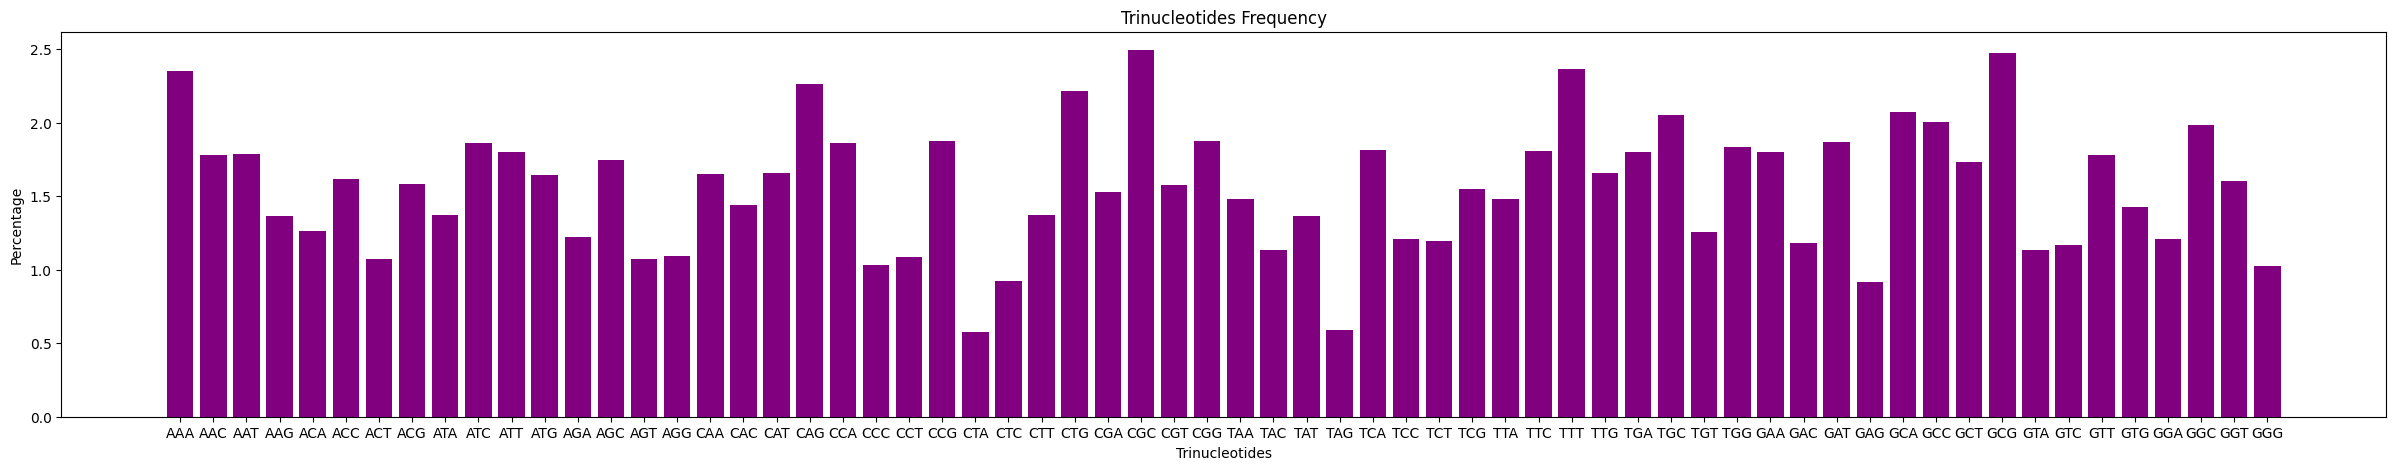

In [139]:
graphical_representation(genome1)

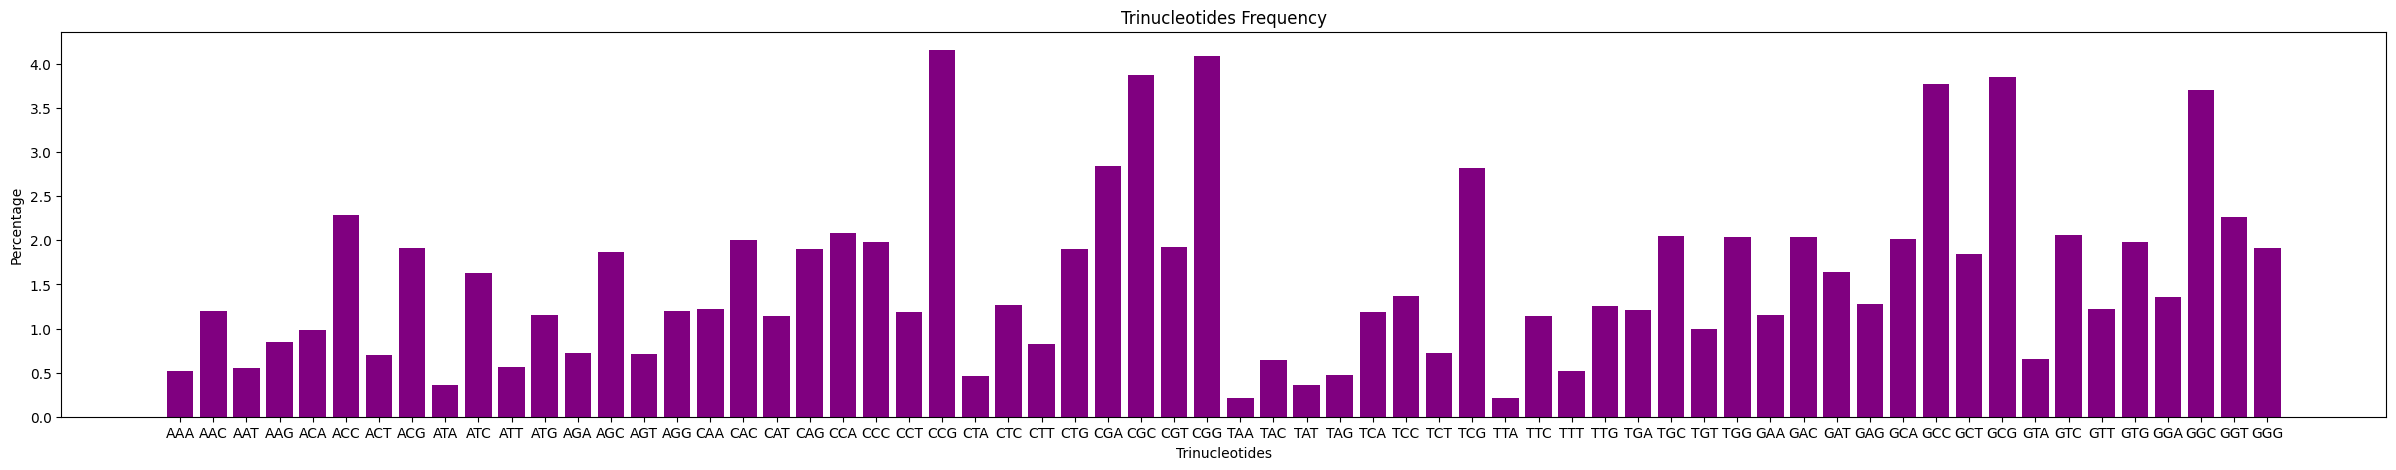

In [140]:
graphical_representation(genome2)

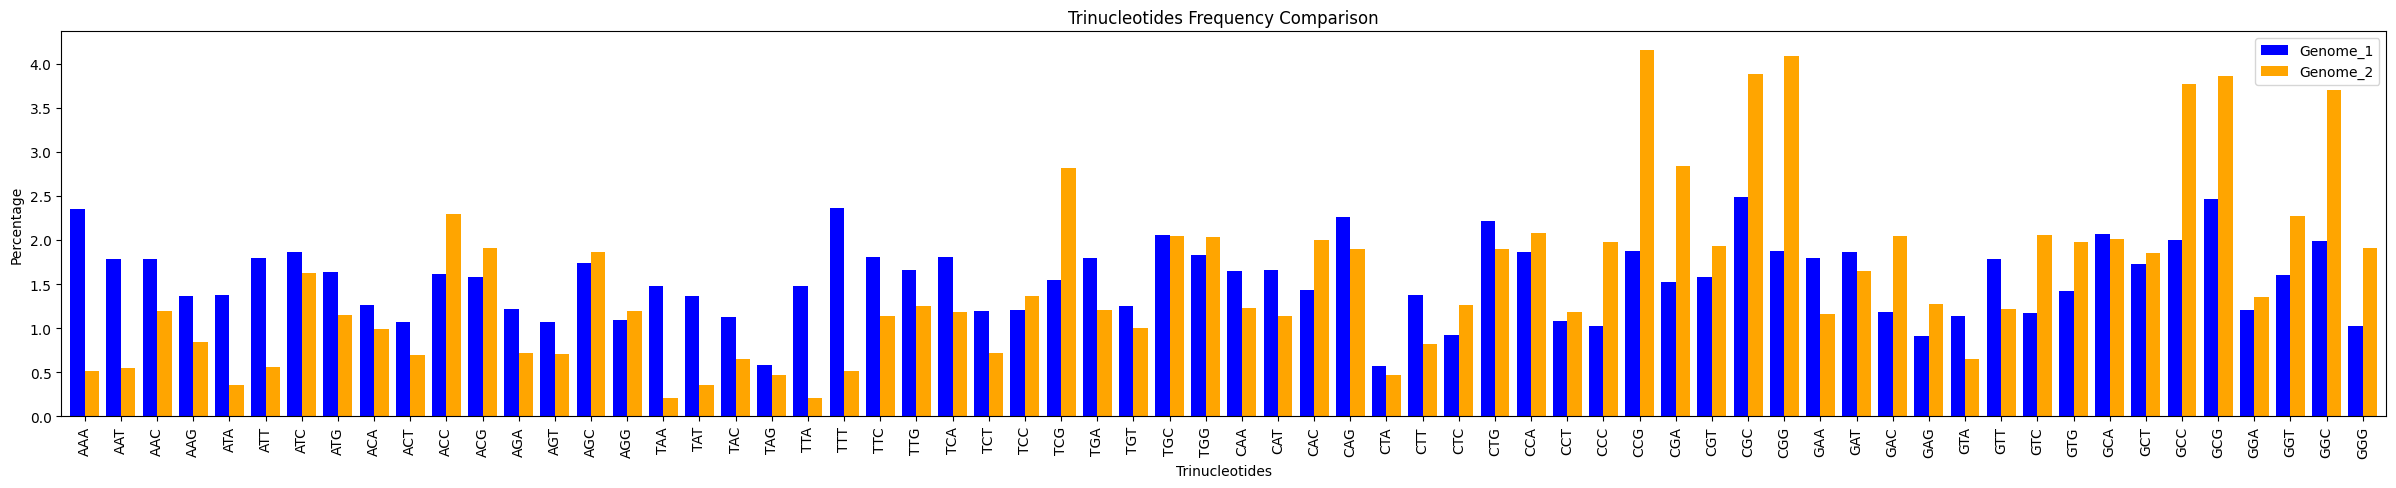

In [141]:
graphical_comparison(genome1, genome2)